## COVID-19

Our world in data 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline
sns.set_style('whitegrid')

In [16]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

#### Gather data from https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv

#### See codebook here: https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

In [5]:
df_world = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv', parse_dates=['date']).set_index(['location', 'date']).sort_index()
df_world

iso_code continent  total_cases  new_cases  \
location    date                                                    
Afghanistan 2020-02-24      AFG      Asia          1.0        1.0   
            2020-02-25      AFG      Asia          1.0        0.0   
            2020-02-26      AFG      Asia          1.0        0.0   
            2020-02-27      AFG      Asia          1.0        0.0   
            2020-02-28      AFG      Asia          1.0        0.0   
...                         ...       ...          ...        ...   
Zimbabwe    2021-03-17      ZWE    Africa      36552.0       17.0   
            2021-03-18      ZWE    Africa      36611.0       59.0   
            2021-03-19      ZWE    Africa      36652.0       41.0   
            2021-03-20      ZWE    Africa      36662.0       10.0   
            2021-03-21      ZWE    Africa      36665.0        3.0   

                        new_cases_smoothed  total_deaths  new_deaths  \
location    date                                                       
Afghanistan 2020-02-24                 NaN           NaN         NaN   
            2020-02-25                 NaN           NaN         NaN   
            2020-02-26                 NaN           NaN         NaN   
            2020-02-27                 NaN           NaN         NaN   
            2020-02-28                 NaN           NaN         NaN   
...                                    ...           ...         ...   
Zimbabwe    2021-03-17              30.143        1508.0         1.0   
            2021-03-18              33.429        1509.0         1.0   
            2021-03-19              32.714        1510.0         1.0   
            2021-03-20              27.286        1510.0         0.0   
            2021-03-21              25.857        1512.0         2.0   

                        new_deaths_smoothed  total_cases_per_million  \
location    date                                                       
Afghanistan 2020-02-24                  NaN                    0.026   
            2020-02-25                  NaN                    0.026   
            2020-02-26                  NaN                    0.026   
            2020-02-27                  NaN                    0.026   
            2020-02-28                  NaN                    0.026   
...                                     ...                      ...   
Zimbabwe    2021-03-17                2.714                 2459.273   
            2021-03-18                2.429                 2463.243   
            2021-03-19                2.000                 2466.001   
            2021-03-20                1.286                 2466.674   
            2021-03-21                1.286                 2466.876   

                        new_cases_per_million  ...  gdp_per_capita  \
location    date                               ...                   
Afghanistan 2020-02-24                  0.026  ...        1803.987   
            2020-02-25                  0.000  ...        1803.987   
            2020-02-26                  0.000  ...        1803.987   
            2020-02-27                  0.000  ...        1803.987   
            2020-02-28                  0.000  ...        1803.987   
...                                       ...  ...             ...   
Zimbabwe    2021-03-17                  1.144  ...        1899.775   
            2021-03-18                  3.970  ...        1899.775   
            2021-03-19                  2.759  ...        1899.775   
            2021-03-20                  0.673  ...        1899.775   
            2021-03-21                  0.202  ...        1899.775   

                        extreme_poverty  cardiovasc_death_rate  \
location    date                                                 
Afghanistan 2020-02-24              NaN                597.029   
            2020-02-25              NaN                597.029   
            2020-02-26              NaN                597.029   
          

In [6]:
df_world.columns

Index(['iso_code', 'continent', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'peopl

add column with double_cases_days with formula:  
$$
\text{doubling rate  in days} = \frac{\log{2}}{\log\frac{\text{total_cases}}{\text{total_cases}-\text{new_cases}}}
$$


In [4]:
df_world['doubling_rate_days'] = np.log(2)/np.log(df_world.total_cases/(df_world.total_cases-df_world.new_cases))
df_world

iso_code continent  total_cases  new_cases  \
location    date                                                    
Afghanistan 2020-02-24      AFG      Asia          1.0        1.0   
            2020-02-25      AFG      Asia          1.0        0.0   
            2020-02-26      AFG      Asia          1.0        0.0   
            2020-02-27      AFG      Asia          1.0        0.0   
            2020-02-28      AFG      Asia          1.0        0.0   
...                         ...       ...          ...        ...   
Zimbabwe    2021-03-16      ZWE    Africa      36535.0       31.0   
            2021-03-17      ZWE    Africa      36552.0       17.0   
            2021-03-18      ZWE    Africa      36611.0       59.0   
            2021-03-19      ZWE    Africa      36652.0       41.0   
            2021-03-20      ZWE    Africa      36662.0       10.0   

                        new_cases_smoothed  total_deaths  new_deaths  \
location    date                                                       
Afghanistan 2020-02-24                 NaN           NaN         NaN   
            2020-02-25                 NaN           NaN         NaN   
            2020-02-26                 NaN           NaN         NaN   
            2020-02-27                 NaN           NaN         NaN   
            2020-02-28                 NaN           NaN         NaN   
...                                    ...           ...         ...   
Zimbabwe    2021-03-16              30.571        1507.0         3.0   
            2021-03-17              30.143        1508.0         1.0   
            2021-03-18              33.429        1509.0         1.0   
            2021-03-19              32.714        1510.0         1.0   
            2021-03-20              27.286        1510.0         0.0   

                        new_deaths_smoothed  total_cases_per_million  \
location    date                                                       
Afghanistan 2020-02-24                  NaN                    0.026   
            2020-02-25                  NaN                    0.026   
            2020-02-26                  NaN                    0.026   
            2020-02-27                  NaN                    0.026   
            2020-02-28                  NaN                    0.026   
...                                     ...                      ...   
Zimbabwe    2021-03-16                2.571                 2458.130   
            2021-03-17                2.714                 2459.273   
            2021-03-18                2.429                 2463.243   
            2021-03-19                2.000                 2466.001   
            2021-03-20                1.286                 2466.674   

                        new_cases_per_million  ...  extreme_poverty  \
location    date                               ...                    
Afghanistan 2020-02-24                  0.026  ...              NaN   
            2020-02-25                  0.000  ...              NaN   
            2020-02-26                  0.000  ...              NaN   
            2020-02-27                  0.000  ...              NaN   
            2020-02-28                  0.000  ...              NaN   
...                                       ...  ...              ...   
Zimbabwe    2021-03-16                  2.086  ...             21.4   
            2021-03-17                  1.144  ...             21.4   
            2021-03-18                  3.970  ...             21.4   
            2021-03-19                  2.759  ...             21.4   
            2021-03-20                  0.673  ...             21.4   

                        cardiovasc_death_rate  diabetes_prevalence  \
location    date                                                     
Afghanistan 2020-02-24                597.029                 9.59   
            2020-02-25                597.029                 9.59   
            2020-02-26                597.029  

add column days with number of days since more than `thresh` cases per country:

In [141]:
thresh = 10000
df_world['days'] = df_world.groupby(level=[0,1]).filter(lambda x: x['total_cases']>thresh).groupby(level=0).cumcount() + 1

In [7]:
df_world_extract = df_world.loc[pd.IndexSlice[:, '2020/10/01': ],:].copy()
df_world_extract

iso_code continent  total_cases  new_cases  \
location    date                                                    
Afghanistan 2020-10-01      AFG      Asia      39285.0       17.0   
            2020-10-02      AFG      Asia      39290.0        5.0   
            2020-10-03      AFG      Asia      39297.0        7.0   
            2020-10-04      AFG      Asia      39341.0       44.0   
            2020-10-05      AFG      Asia      39422.0       81.0   
...                         ...       ...          ...        ...   
Zimbabwe    2021-03-17      ZWE    Africa      36552.0       17.0   
            2021-03-18      ZWE    Africa      36611.0       59.0   
            2021-03-19      ZWE    Africa      36652.0       41.0   
            2021-03-20      ZWE    Africa      36662.0       10.0   
            2021-03-21      ZWE    Africa      36665.0        3.0   

                        new_cases_smoothed  total_deaths  new_deaths  \
location    date                                                       
Afghanistan 2020-10-01              16.429        1460.0         0.0   
            2020-10-02              14.857        1460.0         0.0   
            2020-10-03              15.000        1464.0         4.0   
            2020-10-04              16.286        1464.0         0.0   
            2020-10-05              26.143        1468.0         4.0   
...                                    ...           ...         ...   
Zimbabwe    2021-03-17              30.143        1508.0         1.0   
            2021-03-18              33.429        1509.0         1.0   
            2021-03-19              32.714        1510.0         1.0   
            2021-03-20              27.286        1510.0         0.0   
            2021-03-21              25.857        1512.0         2.0   

                        new_deaths_smoothed  total_cases_per_million  \
location    date                                                       
Afghanistan 2020-10-01                1.000                 1009.162   
            2020-10-02                1.000                 1009.290   
            2020-10-03                1.286                 1009.470   
            2020-10-04                1.286                 1010.600   
            2020-10-05                1.429                 1012.681   
...                                     ...                      ...   
Zimbabwe    2021-03-17                2.714                 2459.273   
            2021-03-18                2.429                 2463.243   
            2021-03-19                2.000                 2466.001   
            2021-03-20                1.286                 2466.674   
            2021-03-21                1.286                 2466.876   

                        new_cases_per_million  ...  gdp_per_capita  \
location    date                               ...                   
Afghanistan 2020-10-01                  0.437  ...        1803.987   
            2020-10-02                  0.128  ...        1803.987   
            2020-10-03                  0.180  ...        1803.987   
            2020-10-04                  1.130  ...        1803.987   
            2020-10-05                  2.081  ...        1803.987   
...                                       ...  ...             ...   
Zimbabwe    2021-03-17                  1.144  ...        1899.775   
            2021-03-18                  3.970  ...        1899.775   
            2021-03-19                  2.759  ...        1899.775   
            2021-03-20                  0.673  ...        1899.775   
            2021-03-21                  0.202  ...        1899.775   

                        extreme_poverty  cardiovasc_death_rate  \
location    date                                                 
Afghanistan 2020-10-01              NaN                597.029   
            2020-10-02              NaN                597.029   
            2020-10-03              NaN                597.029   
          

In [8]:
series_DEU = df_world_extract.loc['Israel'].resample('W').new_cases_per_million.sum() / 10
series_DEU

date
2020-10-04    234.7513
2020-10-11    276.0082
2020-10-18    139.4135
2020-10-25     76.4365
2020-11-01     54.3467
2020-11-08     50.9501
2020-11-15     53.9656
2020-11-22     60.4006
2020-11-29     76.4481
2020-12-06    103.6675
2020-12-13    141.7589
2020-12-20    203.1531
2020-12-27    308.5884
2021-01-03    462.9637
2021-01-10    575.0881
2021-01-17    697.4723
2021-01-24    528.1472
2021-01-31    531.8212
2021-02-07    562.2526
2021-02-14    372.9287
2021-02-21    296.4920
2021-02-28    297.6592
2021-03-07    297.7052
2021-03-14    201.0504
2021-03-21    101.6113
Freq: W-SUN, Name: new_cases_per_million, dtype: float64

### calculate 7 incidence rate per 100,000 

In [9]:
# calculate 7-day incidence rate per 100,000 persons
df_world_extract['7_day_incidence'] = df_world_extract.rolling(7).new_cases_per_million.sum() / 10

In [10]:
df_world_extract['7_day_incidence']

location     date      
Afghanistan  2020-10-01       NaN
             2020-10-02       NaN
             2020-10-03       NaN
             2020-10-04       NaN
             2020-10-05       NaN
                            ...  
Zimbabwe     2021-03-17    1.4198
             2021-03-18    1.5746
             2021-03-19    1.5410
             2021-03-20    1.2853
             2021-03-21    1.2180
Name: 7_day_incidence, Length: 34724, dtype: float64

In [11]:
df_world_extract.reset_index()

,location,date,iso_code,continent,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,7_day_incidence
0,Afghanistan,2020-10-01,AFG,Asia,39285.0,17.0,16.429,1460.0,0.0,1.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,Afghanistan,2020-10-02,AFG,Asia,39290.0,5.0,14.857,1460.0,0.0,1.000,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,Afghanistan,2020-10-03,AFG,Asia,39297.0,7.0,15.000,1464.0,4.0,1.286,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,Afghanistan,2020-10-04,AFG,Asia,39341.0,44.0,16.286,1464.0,0.0,1.286,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,Afghanistan,2020-10-05,AFG,Asia,39422.0,81.0,26.143,1468.0,4.0,1.429,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34719,Zimbabwe,2021-03-17,ZWE,Africa,36552.0,17.0,30.143,1508.0,1.0,2.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,1.4198
34720,Zimbabwe,2021-03-18,ZWE,Africa,36611.0,59.0,33.429,1509.0,1.0,2.429,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,1.5746
34721,Zimbabwe,2021-03-19,ZWE,Africa,36652.0,41.0,32.714,1510.0,1.0,2.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,1.5410
34722,Zimbabwe,2021-03-20,ZWE,Africa,36662.0,10.0,27.286,1510.0,0.0,1.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,1.2853


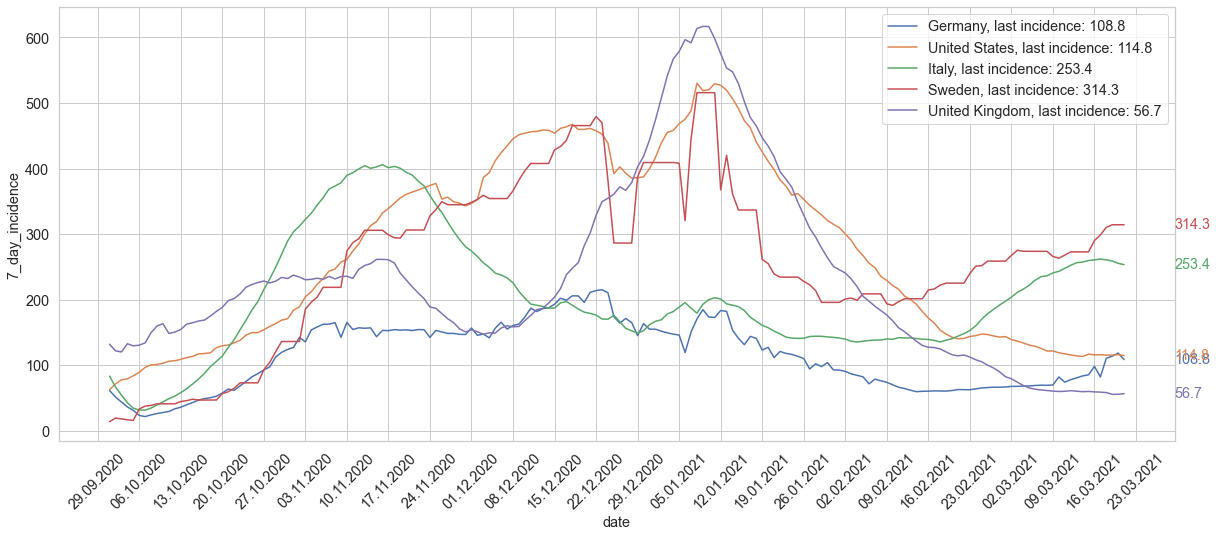

In [20]:
countries = ['Germany', 'United States', 'Italy',  'Sweden', 'United Kingdom']
df_plot = df_world_extract.loc[countries].reset_index()
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data =df_plot, x='date', y='7_day_incidence', hue='location')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
ax.xaxis.set_tick_params(rotation=45)

llabels = ax.get_legend_handles_labels()[-1]
lvalues = [(l.get_ydata()[-1]) for l in  ax.lines if len(l.get_ydata()>0)]
new_labels = [(l[0] +  ", last incidence: {0:.1f}".format(l[1])) for l in zip(llabels, lvalues)]
ax.legend(new_labels)

for l in ax.lines:
    y = l.get_ydata()
    if len(y)>0:
        ax.annotate(f'{y[-1]:4.1f}', xy=(1,y[-1]), xycoords=('axes fraction', 'data'), 
                ha='left', va='center', color=l.get_color(), fontsize='x-large')


<AxesSubplot:xlabel='total_cases', ylabel='location'>

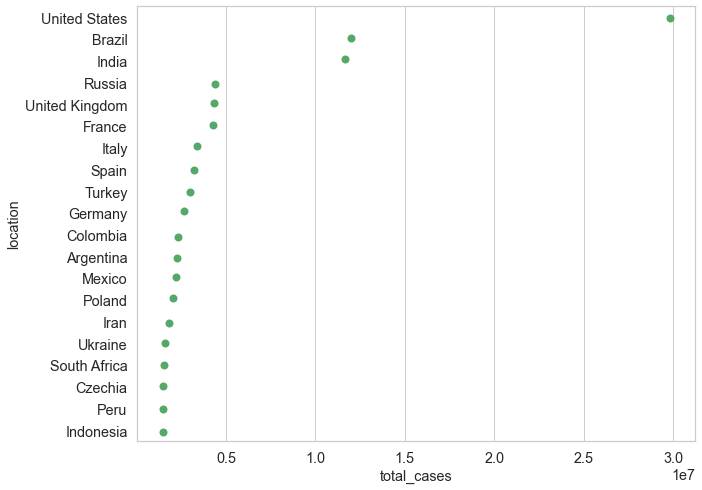

In [23]:
df_plot = df_world.loc[set(df_world.index.get_level_values('location')).difference(['Africa','World', 'Europe','Asia', 'European Union', 'South America', 'North America'])].sort_index().reset_index().groupby('location').last().nlargest(20, 'total_cases')
fig, ax = plt.subplots(figsize=(10,8))
sns.stripplot(data=df_plot, y=df_plot.index, x='total_cases', color='C2', size=8)


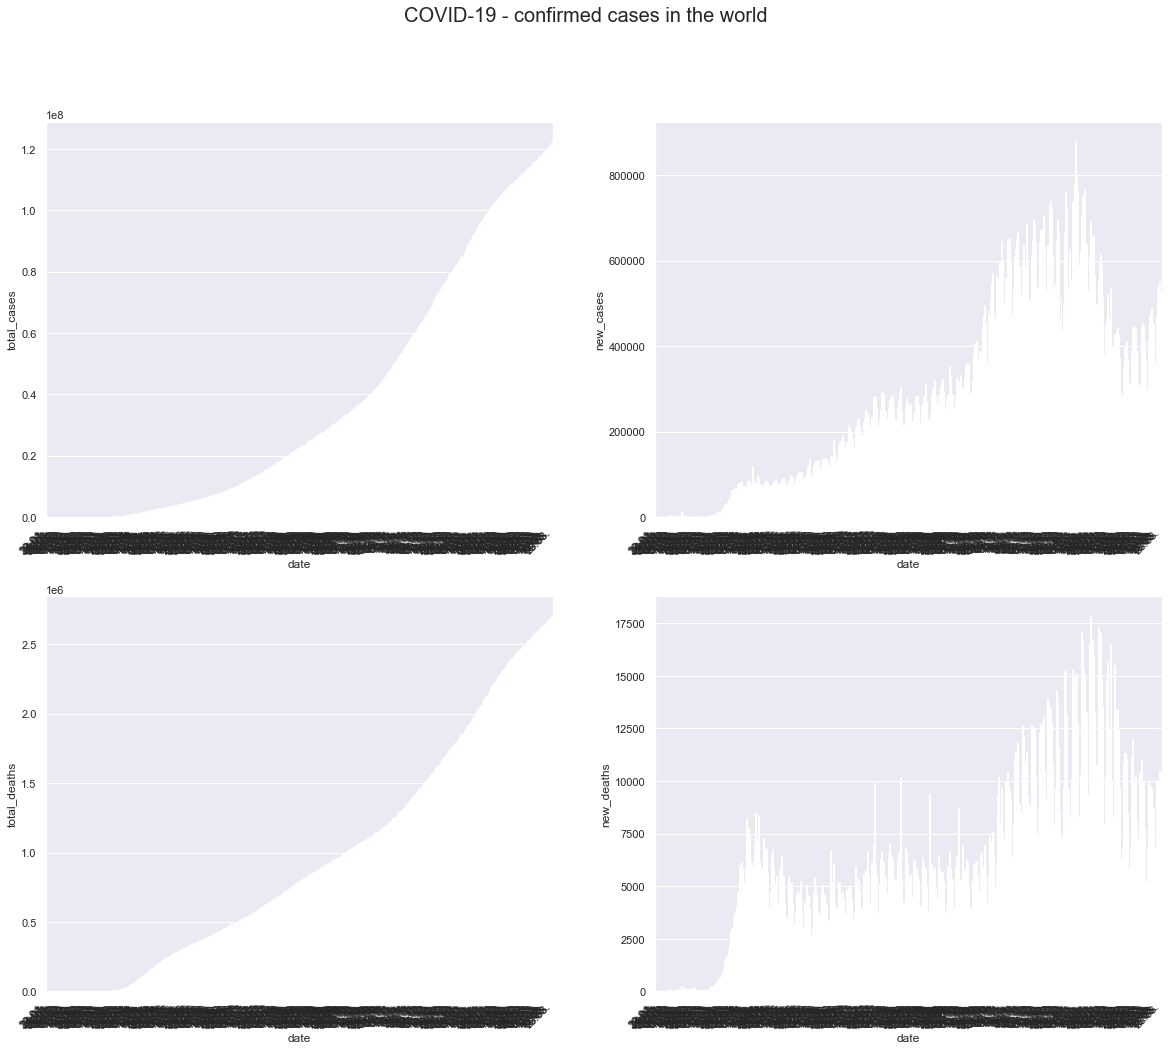

In [5]:
fig, ax = plt.subplots(2,2,figsize=(20,16))
df_plot_data = df_world.loc['World']
for i, ctype in enumerate(['total_cases', 'new_cases', 'total_deaths', 'new_deaths'], 1):
    plt.subplot(2,2,i)
    ax = sns.barplot(data=df_plot_data, x=df_plot_data.index, y=ctype, color=str('C' + str(i-1)))
    xticks = [xdate.strftime('%d.%m.') for xdate in df_plot_data.index]
    _ =ax.set_xticklabels(xticks, rotation=45, ha='right')
_ = plt.suptitle('COVID-19 - confirmed cases in the world',fontsize=20)


In [ ]:
  xticks = [xdate.strftime('%d.%m.') for xdate in df_plot_data.index]
    _ =ax.set_xticklabels(xticks, rotation=45, ha='right')

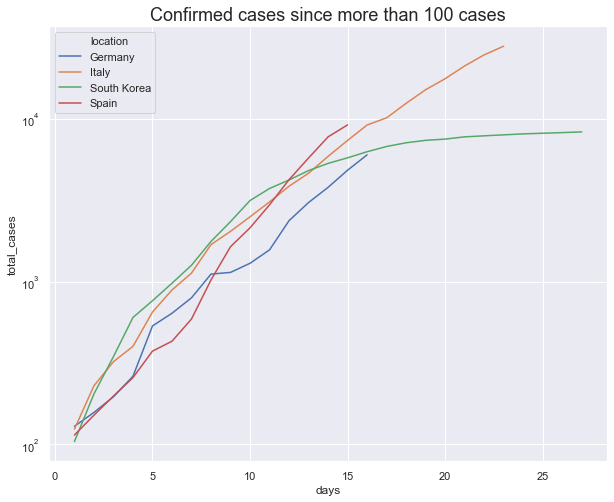

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
df_plot_data = df_world.loc[['Italy', 'Germany', 'Spain','South Korea']].dropna(subset=['days'])
df_plot_data = df_plot_data.reset_index()
ax = sns.lineplot(data=df_plot_data, x='days', y='total_cases', hue='location')
ax.set_yscale('log')
_ = ax.set_title("Confirmed cases since more than {} cases".format(thresh),fontsize=18)

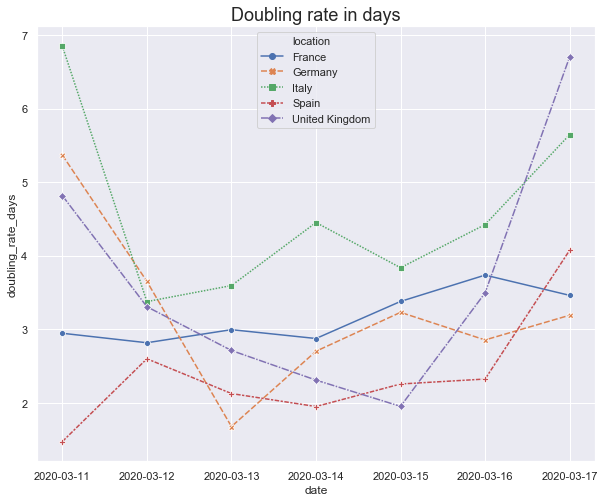

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
df_plot_data = df_world.loc[pd.IndexSlice[['Italy','Germany','Spain', 'France','United Kingdom'],'2020/03/11':],:]
df_plot_data = df_plot_data.reset_index()
sns.lineplot(data=df_plot_data, x='date', y='doubling_rate_days', hue='location', style='location', markers=True)
_ = ax.set_title("Doubling rate in days".format(thresh),fontsize=18)

In [8]:
df_p = df_world.loc[pd.IndexSlice[:,last_date],:].nlargest(10, 'total_cases')
df_p

,,new_cases,new_deaths,total_cases,total_deaths,doubling_rate_days,days
location,date,,,,,,
World,2020-03-17,11594.0,819.0,179112,7426.0,10.357770,57.0
China,2020-03-17,39.0,13.0,81116,3231.0,1441.328442,57.0
Italy,2020-03-17,3233.0,694.0,27980,2503.0,5.645178,23.0
Iran,2020-03-17,0.0,0.0,14991,853.0,inf,20.0
Spain,2020-03-17,1438.0,21.0,9191,309.0,4.073864,15.0
South Korea,2020-03-17,84.0,6.0,8320,81.0,68.307418,27.0
France,2020-03-17,1193.0,21.0,6573,148.0,3.460857,15.0
Germany,2020-03-17,1174.0,1.0,6012,13.0,3.190462,16.0
United States,2020-03-17,1825.0,17.0,3503,58.0,0.941754,14.0


In [9]:
df_p['rate'] = np.log(2)/np.log(df_p.total_cases/(df_p.total_cases-df_p.new_cases))
df_p

,,new_cases,new_deaths,total_cases,total_deaths,doubling_rate_days,days,rate
location,date,,,,,,,
World,2020-03-17,11594.0,819.0,179112,7426.0,10.357770,57.0,10.357770
China,2020-03-17,39.0,13.0,81116,3231.0,1441.328442,57.0,1441.328442
Italy,2020-03-17,3233.0,694.0,27980,2503.0,5.645178,23.0,5.645178
Iran,2020-03-17,0.0,0.0,14991,853.0,inf,20.0,inf
Spain,2020-03-17,1438.0,21.0,9191,309.0,4.073864,15.0,4.073864
South Korea,2020-03-17,84.0,6.0,8320,81.0,68.307418,27.0,68.307418
France,2020-03-17,1193.0,21.0,6573,148.0,3.460857,15.0,3.460857
Germany,2020-03-17,1174.0,1.0,6012,13.0,3.190462,16.0,3.190462
United States,2020-03-17,1825.0,17.0,3503,58.0,0.941754,14.0,0.941754
